In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\practice\ML-LinearRegression-Prac.xlsx")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
df.isnull().sum()

Email                     0
Address                   0
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     546
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df=df.dropna()

In [9]:
df.shape

(454, 8)

<Axes: >

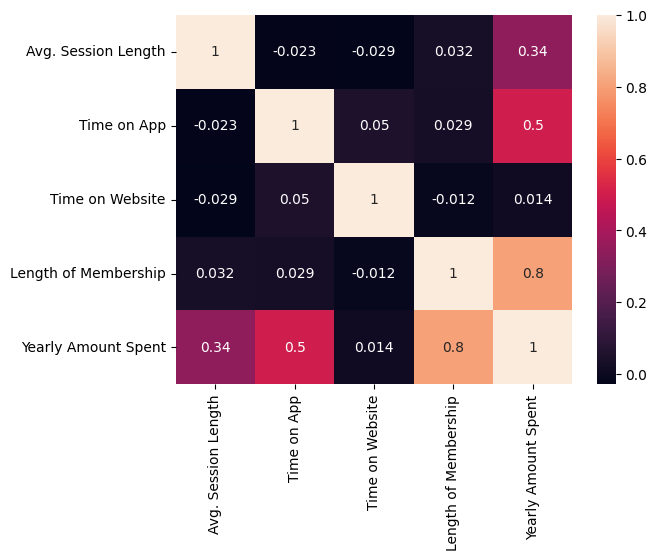

In [10]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Length of Membership', ylabel='Count'>

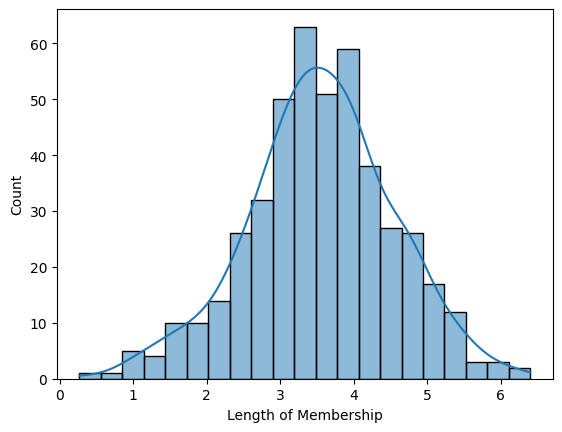

In [12]:
sns.histplot(x=df['Length of Membership'],kde=True)

<Axes: xlabel='Time on App', ylabel='Count'>

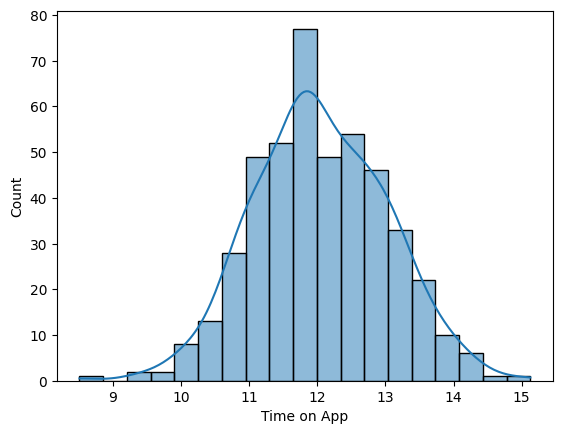

In [13]:
sns.histplot(x=df['Time on App'],kde=True)

<Axes: xlabel='Time on Website', ylabel='Count'>

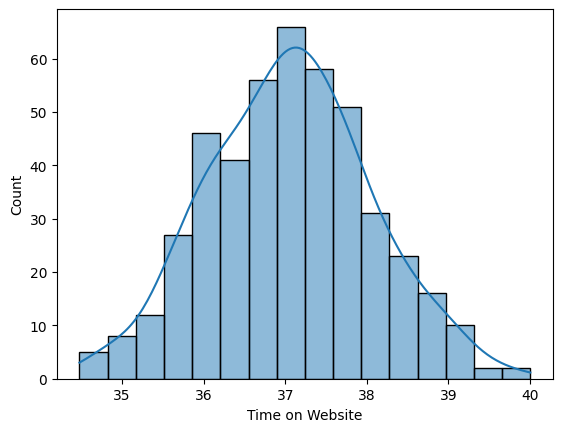

In [15]:
sns.histplot(x=df['Time on Website'],kde=True)

In [44]:
x=df.drop(['Email','Yearly Amount Spent','Address','Avatar'],axis=1)
y=df['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
61,33.241900,12.305418,36.163648,3.062368
41,32.912785,11.365492,37.607793,4.599937
159,33.167137,11.928842,36.914633,3.164944
813,32.865301,12.074830,35.569170,2.399080
565,31.654810,13.014459,37.789036,3.010210
...,...,...,...,...
249,33.014792,11.761172,37.570164,3.834170
607,30.816201,11.851399,36.925043,1.084585
767,34.188184,13.130022,35.429334,3.790552
963,32.047815,12.482670,35.536025,3.393903


In [ ]:
from sklearn.naive_bayes import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)


In [47]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
model.coef_

array([26.16665633, 38.97010091,  0.64595353, 61.30418605])

In [49]:
model.intercept_

np.float64(-1075.26452898361)

In [50]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score
print("the r2score of the model is :",r2_score(y_test,y_pred))


the r2score of the model is : 0.9858209682900623


In [29]:
numeric_col=df.select_dtypes(include='number').columns.to_list()

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

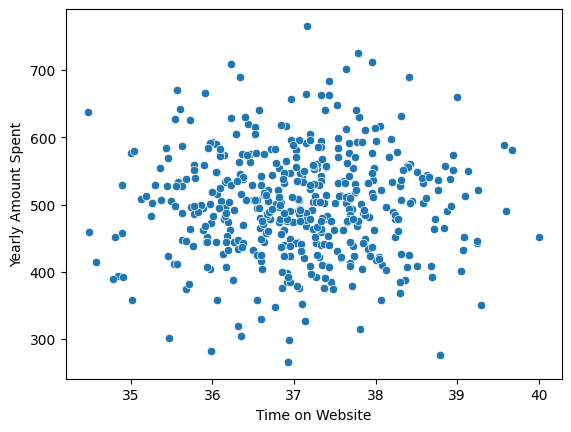

In [52]:
sns.scatterplot(x=df['Time on Website'],y=df['Yearly Amount Spent'])

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

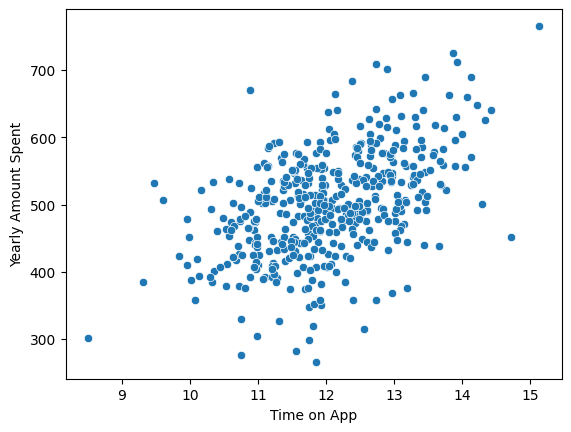

In [53]:
sns.scatterplot(x=df['Time on App'],y=df['Yearly Amount Spent'])

the r2score of the modelAvg. Session Length is : 0.04641124516487083
the intercept for modelAvg. Session Lengthis : -460.7284278463292
the r2score of the modelTime on App is : 0.031060561573251766
the intercept for modelTime on Appis : -23.253627406624275
the r2score of the modelTime on Website is : -0.051988852540624464
the intercept for modelTime on Websiteis : 494.9562749124503
the r2score of the modelLength of Membership is : 0.5460064798924832
the intercept for modelLength of Membershipis : 266.0120630596879
the r2score of the modelYearly Amount Spent is : 1.0
the intercept for modelYearly Amount Spentis : -2.2737367544323206e-13


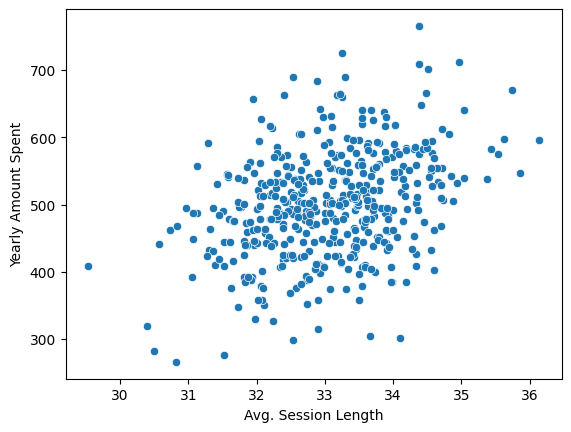

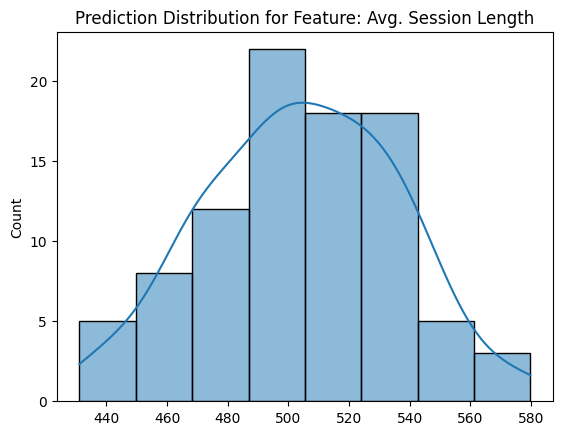

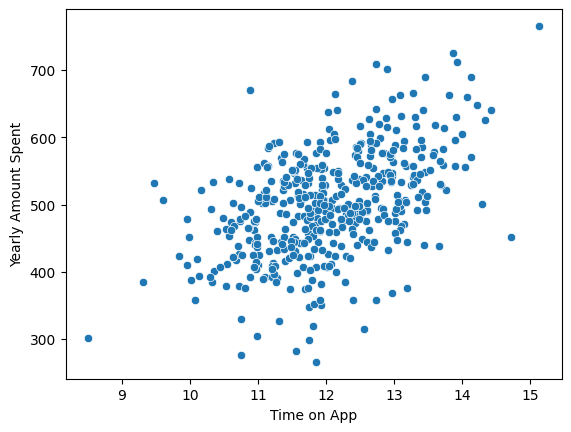

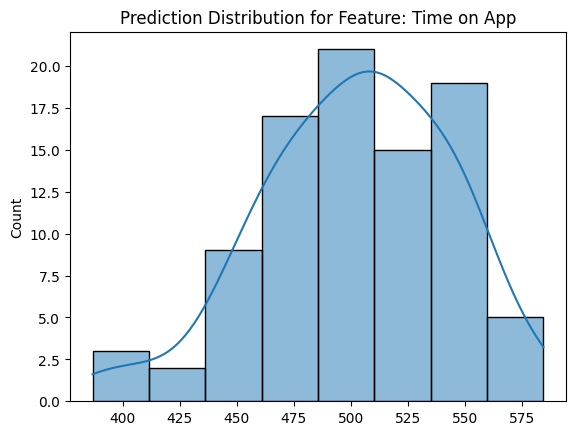

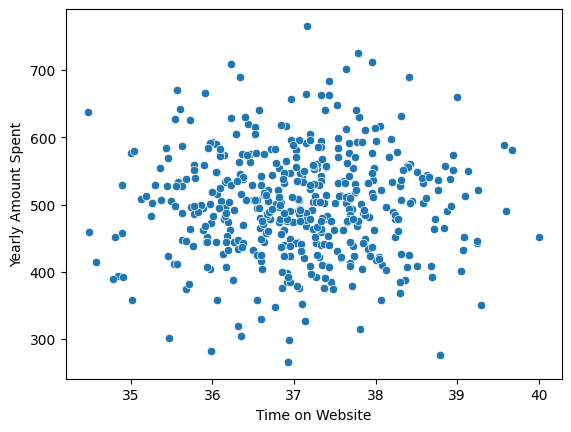

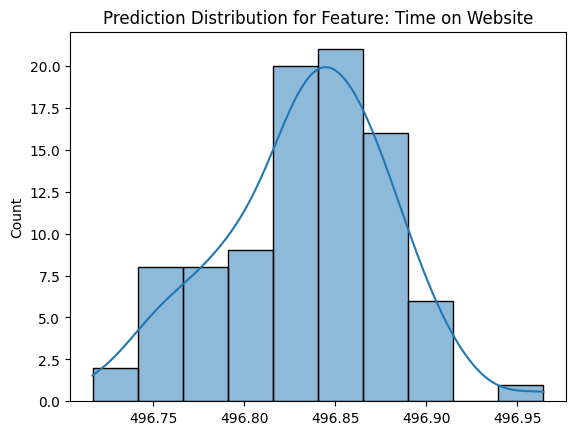

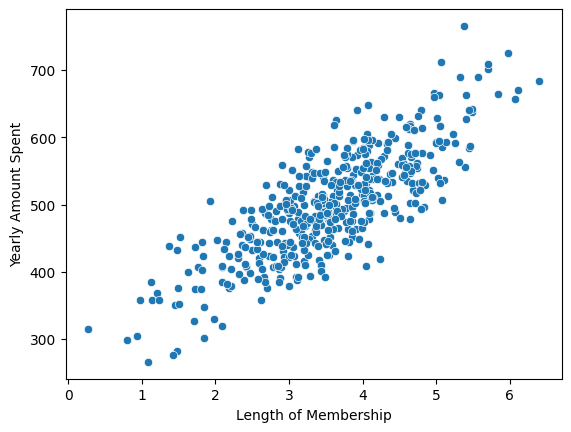

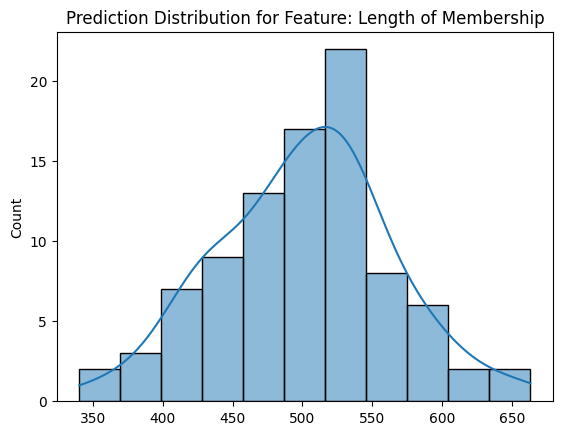

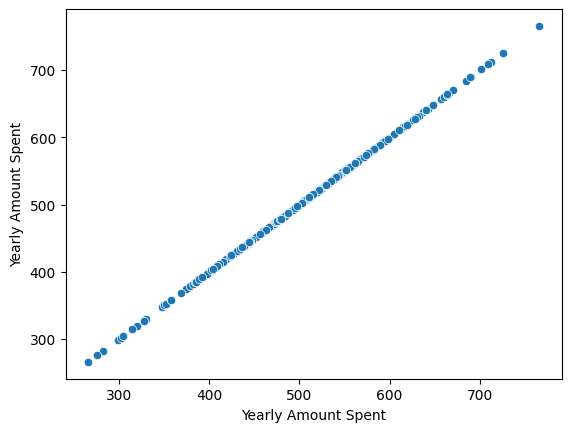

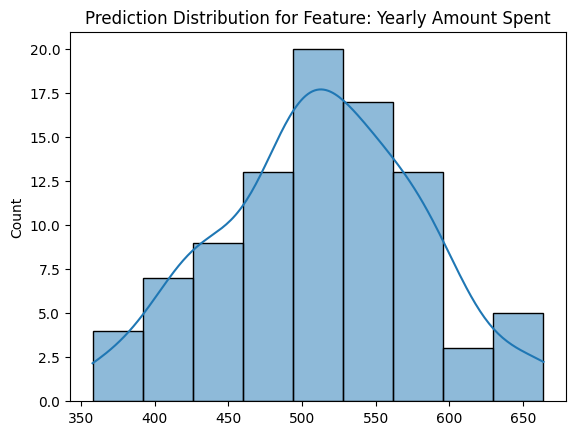

In [57]:
model=[]
for i in numeric_col:
    x=df[[i]]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

    model_train=lr.fit(x_train,y_train)
    y_pred=model_train.predict(x_test)
    print(f"the r2score of the model{i} is :",r2_score(y_test,y_pred))
    print(f"the intercept for model{i}is :",model_train.intercept_)
    model.append(model_train)
    plt.figure()
    sns.scatterplot(x=df[i],y=df['Yearly Amount Spent'])
    plt.figure()

    sns.histplot(y_pred, kde=True)
    plt.title(f"Prediction Distribution for Feature: {i}")

    sns.histplot()

